# Regresión polinómica

Vamos a hacer nuestro primer modelo usando datos sintéticos para familiarizarnos con la sintaxis que cada una de las librerías requiere.

# Importaciones

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Generamos el conjunto de datos

Vamos a generar de manera sintética los datos necesarios para el siguiente modelo:

$$Y = \beta_0 + \beta_1 \boldsymbol X_1 + \boldsymbol\beta \boldsymbol X_{\text{clases}} + \varepsilon$$
$$\varepsilon \sim \mathsf{N}(0,\sigma^2)$$

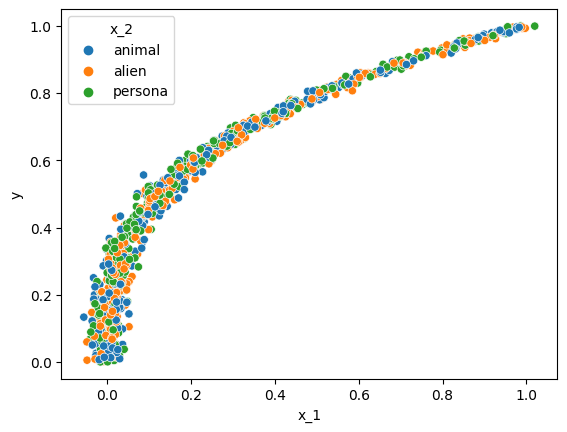

In [2]:
tamano = 1000
np.random.seed(100)

claves = {0:'persona', 1: 'animal', 2:'alien'}

# Predictores
y = np.random.random(tamano)
x_2 = [claves[i] for i in np.random.randint(0, 3, size=tamano)]

# Respuesta
x_1 = y ** 3 + np.random.normal(0, 0.02, tamano)

# Datos
data = pd.DataFrame({'y' : y, 'x_1' : x_1, 'x_2' : x_2})
sns.scatterplot(x = 'x_1', y = 'y', hue = 'x_2', data=data)

# Obtenemos las dummies
data = pd.get_dummies(data = data)

y = data.loc[:, data.columns == "y"]
X = data.loc[:, data.columns != "y"]

Observamos que, como las clases se han obtenido de manera aleatoria, no tienen nada que ver con la variable respuesta. La variable que en cierta manera sí que tiene que ver con $Y$ es $X_1$ a través de la relación $Y = \sqrt[3]{X_1}$, sumando un poco de error normal, para añadir variabilidad al conjunto de datos.

In [3]:
data

y       x_1  x_2_alien  x_2_animal  x_2_persona
0    0.543405  0.162256      False        True        False
1    0.278369  0.004983       True       False        False
2    0.424518  0.064435      False       False         True
3    0.844776  0.577952      False       False         True
4    0.004719  0.017084      False       False         True
..        ...       ...        ...         ...          ...
995  0.656403  0.310452       True       False        False
996  0.291456  0.004109      False        True        False
997  0.150869  0.013256       True       False        False
998  0.036932  0.025943      False        True        False
999  0.597964  0.226430      False       False         True

[1000 rows x 5 columns]

# Modelo polinomial

Más adelante, propondremos medidas que nos ayuden a observar si realmente el modelo es capaz de capturar la mayoría de información. Del gráfico, observamos que existe una relación polinómica, relacionada quizá con un cuadrado o un cubo. Esta la podemos implementar también. 

$$Y = \beta_0 + \beta_1 \sqrt[3]{\boldsymbol X_1}  + \boldsymbol\beta \boldsymbol X_{\text{clases}} + \varepsilon$$ 

## Modelo polinomial base

In [4]:
data['x_1_t'] = data['x_1']**(1/3)
y = data.loc[:, data.columns == "y"]
X = data.loc[:, data.columns != "y"]

In [5]:
data

y       x_1  x_2_alien  x_2_animal  x_2_persona     x_1_t
0    0.543405  0.162256      False        True        False  0.545423
1    0.278369  0.004983       True       False        False  0.170799
2    0.424518  0.064435      False       False         True  0.400904
3    0.844776  0.577952      False       False         True  0.832972
4    0.004719  0.017084      False       False         True  0.257551
..        ...       ...        ...         ...          ...       ...
995  0.656403  0.310452       True       False        False  0.677119
996  0.291456  0.004109      False        True        False  0.160167
997  0.150869  0.013256       True       False        False  0.236666
998  0.036932  0.025943      False        True        False  0.296034
999  0.597964  0.226430      False       False         True  0.609506

[1000 rows x 6 columns]

In [6]:
modelo = smf.ols(formula = 'y ~ x_1_t + x_2_alien + x_2_animal', data = data)
results = modelo.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     5586.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:59:13   Log-Likelihood:                 1239.5
No. Observations:                 885   AIC:                            -2471.
Df Residuals:                     881   BIC:                            -2452.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0458      0.006     -7.934      0.000      -0.057      -0.034
x_2_alien[T.True]     -0.0044      0.005     -0.905      0.366      -0.014       0.005
x_2_animal[T.True]    -0.0055      0.005     -1.102      0.271      -0.015       0.004
x_1_t                  1.0607      0.008    129.362      0.000       1.045       1.077
==============================================================================
Omnibus:                      173.254   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              819.836
Skew:                          -0.817   Prob(JB):                    9.44e-179
Kurtosis:                       7.423   Cond. No.                         6.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
modelo = smf.ols(formula = 'y ~ x_1_t', data = data)
results = modelo.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:59:13   Log-Likelihood:                 1238.8
No. Observations:                 885   AIC:                            -2474.
Df Residuals:                     883   BIC:                            -2464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0490      0.005     -9.753      0.000      -0.059      -0.039
x_1_t          1.0605      0.008    129.499      0.000       1.044       1.077
==============================================================================
Omnibus:                      174.160   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              817.458
Skew:                          -0.824   Prob(JB):                    3.10e-178
Kurtosis:                       7.410   Cond. No.                         5.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Recordatorio del modelo que estamos usando ahora: $Y = \beta_0 + \beta_1 \sqrt[3]{\boldsymbol X_1} + \varepsilon$.

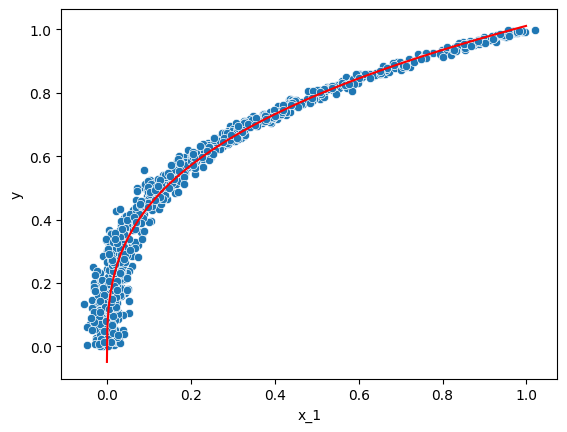

In [8]:
x_1_new = [i for i in np.arange(0.0, 1.0, 0.001)]
y_hat = results.predict({'x_1_t': [i ** (1/3) for i in x_1_new]})
preds = {'x_1_new' : x_1_new, 'y_hat': y_hat}

sns.scatterplot(x = 'x_1', y = 'y', data=data)
sns.lineplot(x = 'x_1_new', y = 'y_hat', data = preds, color = 'red')
plt.show()

Podemos observar, a diferencia del caso anterior, que ahora sí que somos capaces de captar toda la información.

## Modelo polinomial automático

Podemos automatizar el proceso anterior introduciendo nuevos términos en la fórmula para que se realicen las transformaciones de manera automática.

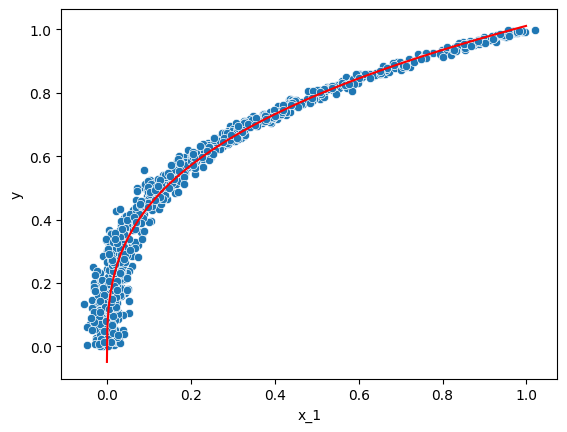

In [9]:
modelo = smf.ols(formula = 'y ~ np.power(x_1, 1/3)', data = data)
# modelo = smf.ols(formula = 'y ~ I(x_1 ** (1 / 3))', data = data) # Forma análoga
results = modelo.fit()
results.summary()

# Predecimos un nuevo conjunto
x_1_new = [i for i in np.arange(0.0, 1.0, 0.001)]
y_hat = results.predict({'x_1': x_1_new})
preds = {'x_1_new' : x_1_new, 'y_hat': y_hat}

sns.scatterplot(x = 'x_1', y = 'y', data=data)
sns.lineplot(x = 'x_1_new', y = 'y_hat', data = preds, color = 'red')
plt.show()

En `sklearn` no se puede calcular de manera automática esa transformación salvo que calculemos la nueva variable de manera manual. Para el caso de un modelo polinomial, sí que podemos hacer esa transformación con `PolynomialFeatures`. Recordemos que cuantos más grados de libertad tengamos más complejo será el modelo y por lo tanto existe posibilidad de que el modelo generalice menos. Para este caso, el modelo será:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2  + \beta_3 X_1^3  + \beta_4 X_1^4  + \beta_5 X_1^5 + \varepsilon$$

In [10]:
# Transformamos el conjunto de datos
trans = PolynomialFeatures(degree=5)
X = pd.DataFrame(X['x_1'])
X_p = trans.fit_transform(X)
print(X_p)

# Ajustamos el modelo lineal
lr = LinearRegression()
modelo_sklearn = lr.fit(X_p, y)

[[1.00000000e+00 1.62256225e-01 2.63270826e-02 4.27173304e-03
  6.93115278e-04 1.12462269e-04]
 [1.00000000e+00 4.98260052e-03 2.48263079e-05 1.23699574e-07
  6.16345564e-10 3.07100372e-12]
 [1.00000000e+00 6.44348826e-02 4.15185409e-03 2.67524231e-04
  1.72378924e-05 1.11072157e-06]
 ...
 [1.00000000e+00 1.32558775e-02 1.75718289e-04 2.32930013e-06
  3.08769172e-08 4.09300634e-10]
 [1.00000000e+00 2.59432743e-02 6.73053481e-04 1.74612111e-05
  4.53000989e-07 1.17523289e-08]
 [1.00000000e+00 2.26429830e-01 5.12704679e-02 1.16091633e-02
  2.62866088e-03 5.95207236e-04]]


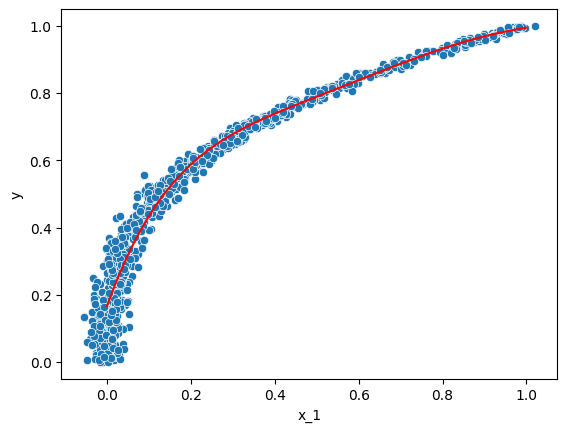

In [11]:
# Predecimos un nuevo conjunto
x_1_new = pd.DataFrame({'x_1' : [i for i in np.arange(0.0, 1.0, 0.001)]})
polies = trans.transform(x_1_new)

# Representamos
y_hat = modelo_sklearn.predict(polies)
preds = {'x_1_new' : x_1_new.to_numpy()[:,0], 'y_hat': y_hat[:,0]}

sns.scatterplot(x = 'x_1', y = 'y', data = data)
sns.lineplot(x = 'x_1_new', y = 'y_hat', data = preds, color = 'red')
plt.show()